## Decision boundary plotting

This notebook contains the code to build decision boundary plots for models trained on datasets with two or more (numerical) input features.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from utils import extract_plot_ranges, generate_grid_points

%config InlineBackend.figure_format = "retina"

# set seaborn aesthetics
sns.set_context("talk")
sns.set_style("white")

# set colormap
CMAP = "tab10"

# set random seed
seed = 10
np.random.seed(seed)

### Plotting decision boundaries for 2D datasets

In [2]:
# 1. build dataset
X, y = make_blobs(n_samples=100, centers=3, n_features=2, 
                  cluster_std=3, random_state=seed)

# 2. split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)

print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_test: {}".format(y_test.shape))

X_train: (75, 2)
y_train: (75,)
X_test: (25, 2)
y_test: (25,)


In [3]:
# 3. train model(s)
knn = KNeighborsClassifier(n_neighbors=20).fit(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)
print("Test accuracy: {:.2f}".format(test_accuracy))

Test accuracy: 0.96


In [4]:
# 4. build grid of shape 100 x 100 = 10k
min_x1, max_x1, min_x2, max_x2 = extract_plot_ranges(X_train)
grid_points = generate_grid_points(min_x1, max_x1, min_x2, max_x2)
print("Grid points: {}".format(grid_points.shape))

# 5. get grid predictions
background_predictions = knn.predict(grid_points)
print("Background predictions: {}".format(background_predictions.shape))

Grid points: (10000, 2)
Background predictions: (10000,)


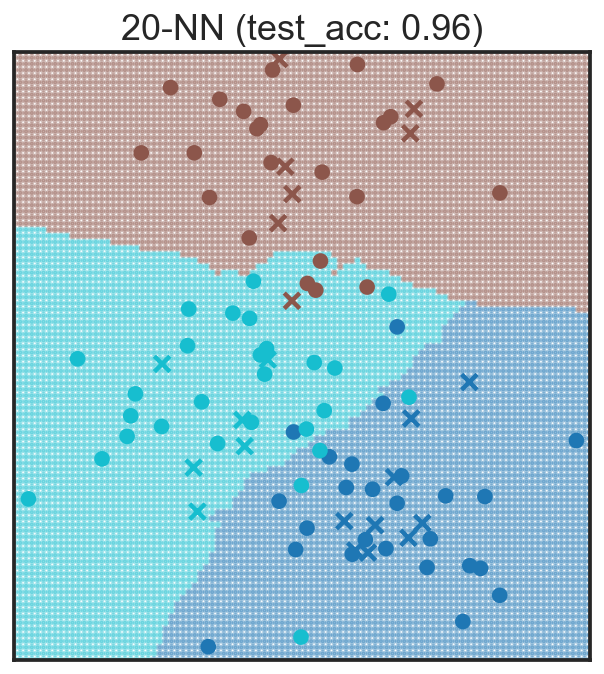

In [5]:
# 6. plot decision boundaries
fig, ax = plt.subplots(1, 1, figsize=(5, 5.5))

# plot grid and dataset
ax.set_title("20-NN (test_acc: {:.2f})".format(test_accuracy))
ax.scatter(grid_points[:, 0], grid_points[:, 1], c=background_predictions, 
           cmap=CMAP, alpha=0.4, s=4)
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, cmap=CMAP)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker="x", s=60, cmap=CMAP)

# set axis parameters
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.set_xlim([min_x1, max_x1])
ax.set_ylim([min_x2, max_x2])
plt.tight_layout(pad=2.)
plt.show()

### Dealing with models trained on higher-dimensional datasets

In [6]:
# 1. build dataset
X, y = make_blobs(n_samples=100, centers=4, n_features=4,
                  cluster_std=4, random_state=seed)

# 2. split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)

print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_test: {}".format(y_test.shape))

X_train: (75, 4)
y_train: (75,)
X_test: (25, 4)
y_test: (25,)


In [7]:
# 3. transform dataset into the 2D space
tsne = TSNE(n_components=2, random_state=seed)
X_2d = tsne.fit_transform(X)

# 4. split transformed dataset into training and test sets
X_train_2d, X_test_2d, _, _ = train_test_split(X_2d, y, random_state=seed)

print("X_train_2d: {}".format(X_train_2d.shape))
print("X_test_2d: {}".format(X_test_2d.shape))

X_train_2d: (75, 2)
X_test_2d: (25, 2)


In [8]:
# 3. train model(s)
svc = SVC().fit(X_train, y_train)
test_accuracy = svc.score(X_test, y_test)
print("Test accuracy: {:.2f}".format(test_accuracy))

Test accuracy: 0.80


In [9]:
# 4. train Voronoi model
voronoi = KNeighborsClassifier(n_neighbors=1).fit(X_train_2d, y_train)

# 5. get score of Voronoi model
y_test_pred = svc.predict(X_test)
voronoi_test_accuracy = voronoi.score(X_test_2d, y_test_pred)
print("Voronoi test accuracy: {:.2f}".format(voronoi_test_accuracy))

Voronoi test accuracy: 0.92


In [10]:
# 6. build grid
min_x1, max_x1, min_x2, max_x2 = extract_plot_ranges(X_train_2d)
grid_points = generate_grid_points(min_x1, max_x1, min_x2, max_x2)
print("Grid points: {}".format(grid_points.shape))

# 7. get grid predictions
background_predictions = voronoi.predict(grid_points)
print("Background predictions: {}".format(background_predictions.shape))

Grid points: (10000, 2)
Background predictions: (10000,)


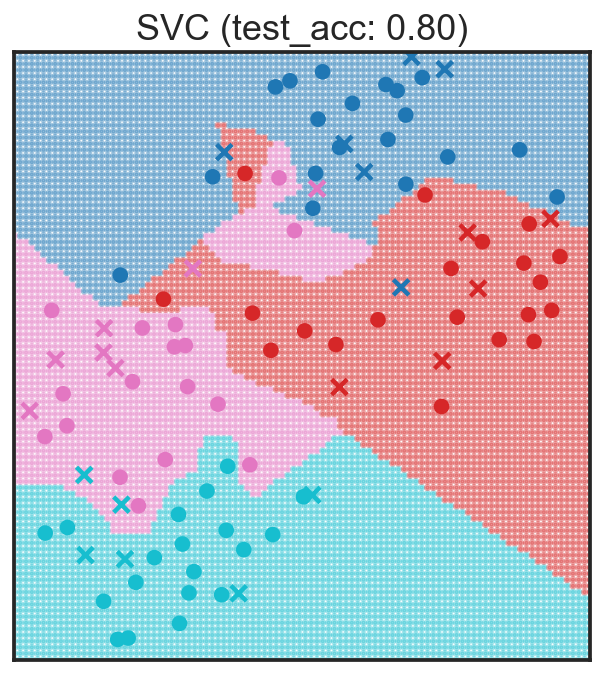

In [11]:
# 8. plot decision boundaries
fig, ax = plt.subplots(1, 1, figsize=(5, 5.5))

# plot grid and dataset
ax.set_title("SVC (test_acc: {:.2f})".format(test_accuracy))
ax.scatter(grid_points[:, 0], grid_points[:, 1], 
           c=background_predictions, cmap=CMAP, alpha=0.4, s=4)
scatter = ax.scatter(X_train_2d[:, 0], X_train_2d[:, 1], 
                     c=y_train, s=40, cmap=CMAP)
ax.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, 
           marker="x", s=60, cmap=CMAP)

# set axis parameters
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
ax.set_xlim([min_x1, max_x1])
ax.set_ylim([min_x2, max_x2])
plt.tight_layout(pad=2.)
plt.show()